<a href="https://colab.research.google.com/github/Rak28/CATcodeathon/blob/main/Predicting_Machine_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataset=pd.read_excel('/content/Dataset_Predicting component failures.xlsx')
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


,Id,Time,Machine,Component,Parameter,Value
0,48,2022-06-03 08:09:29+00:00,Excavator_1,Engine,Temparature,104.0
1,5,2022-05-12 02:05:42+00:00,Articulated_Truck_1,Fuel,Water in Fuel,70.0
2,24,2022-05-27 06:25:04+00:00,Articulated_Truck_1,Engine,Temparature,104.0
3,23,2022-05-12 20:36:47+00:00,Backhoe_Loader_1,Drive,Transmission Pressure,231.0
4,42,2022-06-28 04:06:30+00:00,Excavator_1,Engine,Oil Pressure,39.0


In [ ]:
dg=dataset.groupby('Machine')
dg.first()
d=dg.get_group('Excavator_1').sort_values('Time')
d['CompParameter']=d['Component'] + ' ' +d['Parameter']
d.groupby('Parameter').get_group('System Voltage')
d.groupby('Parameter').get_group('Hydraulic Pump Rate')
d.groupby('Parameter').get_group('Exhaust Gas Temparature')
d.groupby('Component').get_group('Drive')
d.groupby('Parameter').get_group('Water in Fuel')
d.groupby('Component').get_group('Misc')
d.groupby('Parameter').get_group('Air Filter Pressure')
d

,Id,Time,Machine,Component,Parameter,Value,CompParameter
653,17,2022-05-01 12:55:10+00:00,Excavator_1,Misc,System Voltage,12.016341,Misc System Voltage
474,15,2022-05-01 13:12:10+00:00,Excavator_1,Engine,Temparature,95.000000,Engine Temparature
451,43,2022-05-02 02:23:32+00:00,Excavator_1,Misc,Hydraulic Pump Rate,117.000000,Misc Hydraulic Pump Rate
200,26,2022-05-02 04:59:29+00:00,Excavator_1,Misc,Exhaust Gas Temparature,345.000000,Misc Exhaust Gas Temparature
210,22,2022-05-02 07:48:17+00:00,Excavator_1,Misc,Exhaust Gas Temparature,240.000000,Misc Exhaust Gas Temparature
...,...,...,...,...,...,...,...
330,2,2022-06-29 18:42:51+00:00,Excavator_1,Engine,Temparature,93.000000,Engine Temparature
287,1,2022-06-29 22:23:48+00:00,Excavator_1,Drive,Brake Control,9.000000,Drive Brake Control
272,18,2022-06-29 22:26:12+00:00,Excavator_1,Misc,Exhaust Gas Temparature,213.000000,Misc Exhaust Gas Temparature
215,42,2022-06-30 03:23:08+00:00,Excavator_1,Drive,Pedal Sensor,4.769654,Drive Pedal Sensor


In [77]:
dg.first()

,Id,Time,Component,Parameter,Value
Machine,,,,,
Articulated_Truck_1,5,2022-05-12 02:05:42+00:00,Fuel,Water in Fuel,70.0
Asphalt_Paver_1,19,2022-05-02 02:13:44+00:00,Fuel,Temparature,395.0
Backhoe_Loader_1,23,2022-05-12 20:36:47+00:00,Drive,Transmission Pressure,231.0
Dozer_1,44,2022-06-15 17:30:33+00:00,Fuel,Temparature,215.0
Excavator_1,48,2022-06-03 08:09:29+00:00,Engine,Temparature,104.0


In [107]:
probData=d
failureProb=[]
for i in range(len(d)):
  if probData['CompParameter'].iloc[i]=="Engine Oil Pressure" and probData['Value'].iloc[i]<=25 and probData['Value'].iloc[i]>=65:
    failureProb.append(1)
  elif probData['CompParameter'].iloc[i]=="Engine Speed" and probData['Value'].iloc[i]>=1800:
    failureProb.append(2)
  elif probData['CompParameter'].iloc[i]=="Engine Temparature" and probData['Value'].iloc[i]>=105:
    failureProb.append(1)
  elif probData['CompParameter'].iloc[i]=="Drive Brake Control" and probData['Value'].iloc[i]<=1:
    failureProb.append(2)
  elif probData['CompParameter'].iloc[i]=="Drive Transmission Pressure" and probData['Value'].iloc[i]<=200 and probData['Value'].iloc[i]>=450:
    failureProb.append(2)
  elif probData['CompParameter'].iloc[i]=="Drive Pedal Sensor" and probData['Value'].iloc[i]>=4.7:
    failureProb.append(3)
  elif probData['CompParameter'].iloc[i]=="Fuel Water in Fuel" and probData['Value'].iloc[i]>=1800:
    failureProb.append(1)
  elif probData['CompParameter'].iloc[i]=="Fuel Level" and probData['Value'].iloc[i]<=1:
    failureProb.append(1)
  elif probData['CompParameter'].iloc[i]=="Fuel Pressure" and probData['Value'].iloc[i]<=35 and probData['Value'].iloc[i]>=65:
    failureProb.append(3)
  elif probData['CompParameter'].iloc[i]=="Fuel Temparature" and probData['Value'].iloc[i]>=400:
    failureProb.append(1)

  elif probData['CompParameter'].iloc[i]=="Misc System Voltage" and probData['Value'].iloc[i]<=12 and probData['Value'].iloc[i]>=15:
    failureProb.append(1)
  elif probData['CompParameter'].iloc[i]=="Misc Exhaust Gas Temparature" and probData['Value'].iloc[i]>=365:
    failureProb.append(2)
  elif probData['CompParameter'].iloc[i]=="Misc Hydraulic Pump Rate" and probData['Value'].iloc[i]>=125:
    failureProb.append(1)
  elif probData['CompParameter'].iloc[i]=="Misc Air Filter Pressure Drop" and probData['Value'].iloc[i]<=20:
    failureProb.append(2)
  else:
    failureProb.append(0)

probData['Failure Prob']=failureProb

probData



,Id,Time,Machine,Component,Parameter,Value,CompParameter,Failure Prob,Param Code,Dates
653,17,2022-05-01 12:55:10+00:00,Excavator_1,Misc,System Voltage,12.016341,Misc System Voltage,0,13,2022-05-01
474,15,2022-05-01 13:12:10+00:00,Excavator_1,Engine,Temparature,95.000000,Engine Temparature,0,5,2022-05-01
451,43,2022-05-02 02:23:32+00:00,Excavator_1,Misc,Hydraulic Pump Rate,117.000000,Misc Hydraulic Pump Rate,0,12,2022-05-02
200,26,2022-05-02 04:59:29+00:00,Excavator_1,Misc,Exhaust Gas Temparature,345.000000,Misc Exhaust Gas Temparature,0,11,2022-05-02
210,22,2022-05-02 07:48:17+00:00,Excavator_1,Misc,Exhaust Gas Temparature,240.000000,Misc Exhaust Gas Temparature,0,11,2022-05-02
...,...,...,...,...,...,...,...,...,...,...
330,2,2022-06-29 18:42:51+00:00,Excavator_1,Engine,Temparature,93.000000,Engine Temparature,0,5,2022-06-29
287,1,2022-06-29 22:23:48+00:00,Excavator_1,Drive,Brake Control,9.000000,Drive Brake Control,0,0,2022-06-29
272,18,2022-06-29 22:26:12+00:00,Excavator_1,Misc,Exhaust Gas Temparature,213.000000,Misc Exhaust Gas Temparature,0,11,2022-06-29
215,42,2022-06-30 03:23:08+00:00,Excavator_1,Drive,Pedal Sensor,4.769654,Drive Pedal Sensor,3,1,2022-06-30


In [71]:
from sklearn.preprocessing import LabelEncoder
lb_make= LabelEncoder()
probData['Param Code']=lb_make.fit_transform(probData['CompParameter'])
# probData[['Param Code','CompParameter']].unique()
probData['CompParameter'].unique()
probData['Param Code'].unique()

array([13,  5, 12, 11,  4,  3,  8,  7,  1,  2,  6,  0, 10,  9])

In [112]:
le_name_mapping = dict(zip(lb_make.classes_, lb_make.transform(lb_make.classes_)))
print(le_name_mapping)

{'Drive Brake Control': 0, 'Drive Pedal Sensor': 1, 'Drive Transmission Pressure': 2, 'Engine Oil Pressure': 3, 'Engine Speed': 4, 'Engine Temparature': 5, 'Fuel Level': 6, 'Fuel Pressure': 7, 'Fuel Temparature': 8, 'Fuel Water in Fuel': 9, 'Misc Air Filter Pressure': 10, 'Misc Exhaust Gas Temparature': 11, 'Misc Hydraulic Pump Rate': 12, 'Misc System Voltage': 13}


In [ ]:
probData['Dates']=pd.to_datetime(probData['Time']).dt.date
probData
probTime=probData.groupby('Dates')
probTime.size()

In [96]:
probCode=probData.groupby('Dates')['Param Code'].apply(list)
probFail=probData.groupby('Dates')['Failure Prob'].apply(list)
probFail[0]

[0, 0]

In [111]:
fail=[]
error=[1,2,3]
for i in range(len(probData)):
  if probData['Failure Prob'].iloc[i] in error:
    fail.append(1)
  else:
    fail.append(0)
probData['Failure']=fail
probData

,Id,Time,Machine,Component,Parameter,Value,CompParameter,Failure Prob,Param Code,Dates,Failure
653,17,2022-05-01 12:55:10+00:00,Excavator_1,Misc,System Voltage,12.016341,Misc System Voltage,0,13,2022-05-01,0
474,15,2022-05-01 13:12:10+00:00,Excavator_1,Engine,Temparature,95.000000,Engine Temparature,0,5,2022-05-01,0
451,43,2022-05-02 02:23:32+00:00,Excavator_1,Misc,Hydraulic Pump Rate,117.000000,Misc Hydraulic Pump Rate,0,12,2022-05-02,0
200,26,2022-05-02 04:59:29+00:00,Excavator_1,Misc,Exhaust Gas Temparature,345.000000,Misc Exhaust Gas Temparature,0,11,2022-05-02,0
210,22,2022-05-02 07:48:17+00:00,Excavator_1,Misc,Exhaust Gas Temparature,240.000000,Misc Exhaust Gas Temparature,0,11,2022-05-02,0
...,...,...,...,...,...,...,...,...,...,...,...
330,2,2022-06-29 18:42:51+00:00,Excavator_1,Engine,Temparature,93.000000,Engine Temparature,0,5,2022-06-29,0
287,1,2022-06-29 22:23:48+00:00,Excavator_1,Drive,Brake Control,9.000000,Drive Brake Control,0,0,2022-06-29,0
272,18,2022-06-29 22:26:12+00:00,Excavator_1,Misc,Exhaust Gas Temparature,213.000000,Misc Exhaust Gas Temparature,0,11,2022-06-29,0
215,42,2022-06-30 03:23:08+00:00,Excavator_1,Drive,Pedal Sensor,4.769654,Drive Pedal Sensor,3,1,2022-06-30,1


In [217]:
# probData['Dates']=str(pd.to_datetime(probData['Time']).dt.date) + ' ' + str(pd.to_datetime(probData['Time']).dt.time)
probData['Dates']=pd.to_datetime(probData['Time'].dt.tz_convert(None))
# time_ref=pd.DataFrame({'date':pd.date_range('2022-05-01',periods=len(probData))})
# time_ref['Dates']=probData['']-time_ref['date']
# time_ref['seconds']=time_ref['Dates'].dt.total_seconds()
pData=probData
pData.index=pd.to_datetime(probData['Time'].dt.tz_convert(None))
probData['Dates']
time_ref.index=pd.to_datetime(probData['Time'].dt.tz_convert(None))
# type(time_ref['date'])
time_ref['Failure']=pData['Failure']

del time_ref['Param Code']
probData['Failure']
# time_ref['seconds']
type(probData)
time_ref
# btc=time_ref

,Failure
Time,
2022-05-01 12:55:10,0
2022-05-01 13:12:10,0
2022-05-02 02:23:32,0
2022-05-02 04:59:29,0
2022-05-02 07:48:17,0
...,...
2022-06-29 18:42:51,0
2022-06-29 22:23:48,0
2022-06-29 22:26:12,0


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

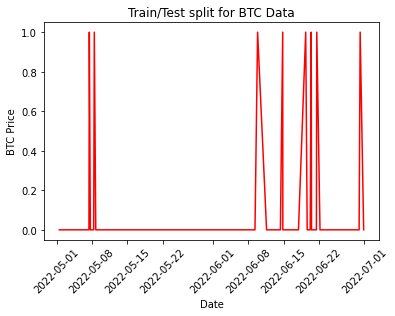

In [162]:
train = btc[btc.index < pd.to_datetime("2020-11-01 00:00:00", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2020-11-01 00:00:00", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [163]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [164]:
y = train['Failure']

In [166]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [167]:
ARMAmodel = ARMAmodel.fit()

ValueError: ignored

In [168]:
from statsmodels.tsa.arima.model import ARIMA

ModuleNotFoundError: ignored

In [213]:
probData[['Param Code','Dates','Failure']]
# X=probData[['Param Code','Dates']]
X=time_ref
y=probData[['Failure']]

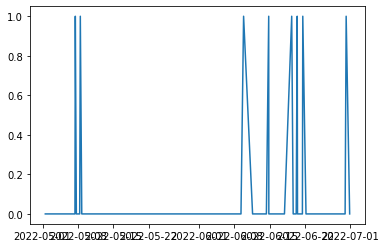

In [220]:
plt.plot(X.index,X)

In [205]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [176]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-0.15437081559609478


In [208]:
import numpy as np
series=time_ref
# function for generating the lagged matrix
def split_sequence(sequence, window_size):
    X = []
    y = []
    # for all indexes
    for i in range(len(sequence)):
        end_idx = i + window_size
        # exit condition
        if end_idx > len(sequence) - 1:
            break
        # get X and Y values
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


train = series[:-int(len(series)/10)]
test = series[-int(len(series)/10):]
X_train, y_train = split_sequence(train, window_size=180)

In [210]:
import statsmodels.api as sm

# train Ordinary Least Squares model
# X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()

print(result.summary())

ValueError: ignored

In [202]:
import statsmodels.api as sm

# train Ordinary Least Squares model
X_train = sm.add_constant(X_train)
model = sm.GLS(y_train, X_train)
result = model.fit()

print(result.summary())

ValueError: ignored

In [182]:
X_test = sm.add_constant(X_test)

y_train_preds = result.predict(X_train)
y_test_preds = result.predict(X_test)

from matplotlib import pyplot as plt

# indexes start from 24 due to the window size we chose
# plt.plot(pd.Series(y_train, index=train[24:].index), label='train values')
plt.plot(pd.Series(y_test, index=X_train.index), label='test values')
plt.plot(pd.Series(y_train_preds, index=train[24:].index), label='train predictions')
plt.plot(pd.Series(y_test_preds, index=test[24:].index), label='test predictions')
plt.xlabel('Date time')
plt.ylabel('Temp (Celcius)')
plt.title('Forecasts')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: ignored

In [183]:
y_test

,Failure
Time,
2022-06-24 06:17:06,0
2022-05-10 15:23:39,0
2022-05-07 00:43:42,0
2022-05-21 16:46:11,0
2022-05-01 12:55:10,0
...,...
2022-06-20 16:43:18,0
2022-05-17 23:42:24,0
2022-05-16 16:26:30,0


In [ ]:
print(str(dataset[['Component','Parameter']]))

    Component                Parameter
0      Engine              Temparature
1        Fuel            Water in Fuel
2      Engine              Temparature
3       Drive    Transmission Pressure
4      Engine             Oil Pressure
..        ...                      ...
995      Misc  Exhaust Gas Temparature
996      Fuel                    Level
997      Misc      Air Filter Pressure
998      Misc      Air Filter Pressure
999      Misc  Exhaust Gas Temparature

[1000 rows x 2 columns]
